# L02 12/03/24

# R&D Process
## Analysis of the state of the art
This is the first step, before starting to design a method, it is very important to analyse the state of the art to fin:
- Methods doing the same task
- benchmarks to compare your method with the state of art
- metrics for assessing your method


## Data collection and analysis

- Data is the most important resource for a data scientist
- Two types of datasets:
  - benchmarks in the state of the art
  - custom datasets

| Dataset Type | Pros | Cons |
| --- | --- | --- |
| Sota (state of the art) benchmark | 1. Comparison with sota methods<br>2. Reliable results<br>3. Huge amount | 1. Data may not be replicable in real life<br>2. Model may not work |
| Custom benchmark | 1. Same data of the final application<br>2. Full knowledge of the dataset | 1. Comparison with sota methods may not be replicable<br>2. Creation is extremely hard and expensive |

### Types of data
#### Adimensional data
#### Digital signal data
in data science, it's the discrete representation of a wave carrying information, it can be:
- Time dependent
  - The signal represents a quantity varying in the time
- Time independent
  - teh signal represent several quantities dependent from each other, measured in a specific time signal
#### Images
- single feature image, with just one channel
- Multiple feature image, with multiple channels.
### Ground truths
### Existing tools & frameworks for data collection
- Amazon mechanical turk



## Data preprocessing

### - cleaning  

What do we do with missing data?
- Discard feature having missing data
- discard samples having missing data
- substitute missing data with plausible content

### - **Encoding**
Machine learning models can only work with numerical values, it is necessary to transform the categorical values of the relevant features into numerical ones.  
- Variable encoding: if encoding a categorical value for an input
- Labeling: if encoding cactegorical values for ground truth, we assign the an integer

### - **Normalizing**
The range of the variables affect their importance, we need to normalize them so that each variable resides in the same range
- min-max normalization
  - if the variable is under analysis has a specific range, it's possible to use this normalization
  - ```from sklearn.preprocessing import MinMaxScaler```
- standardization
  - if the range is unknown a priori
  - sets the mean to 0 and the variance to 1
  - ```from sk.preprocessing import StandardScaler ```

### - **Outlier detection**
  - **Elliptic envelope**
  - **Kernel density estimation**, is the process of identifying data points that differ significantly from other data points in a dataset. The kernel density function is a non-parametric way to estimate the probability density function of a continuous random variable. It can be used in outlier detection by calculating the density of each data point and identifying those with low densities as potential outliers.
  - **SVM**
  - **Isolation forests** They work by building decision trees for randomly selected subsets of the data, which are used to isolate anomalous points. The isolation trees are then combined to form an isolation forest, which can be used to calculate an anomaly score for each data point. Points with high anomaly scores are considered outliers or anomalies.
  - **PCA**
  - **DBScan**, Density-Based Spatial Clustering of Applications with Noise, the most robust method

### - splitting

# Algorithms

### Random Forest
it is one the most popular tree-bbased supervised learning algorithms
1. Select random samples from a given data or training set.
2. This algorithm will construct a decision tree for every
training data.
3. Voting will take place by averaging the decision tree.
4. Finally, select the most voted prediction result as the
final prediction result.
### Decision Trees
- Entropy: measures the impurity of the values of a sample
   $$E(s) = \sum_{c \in C}^{} p(c) \; log \; 2p(c)$$
- Entropy values are between 0 and 1
- information gain represents the difference in entropy before and after a division based on a given attribute, measures the reduction of uncertainty given an additional piece of information

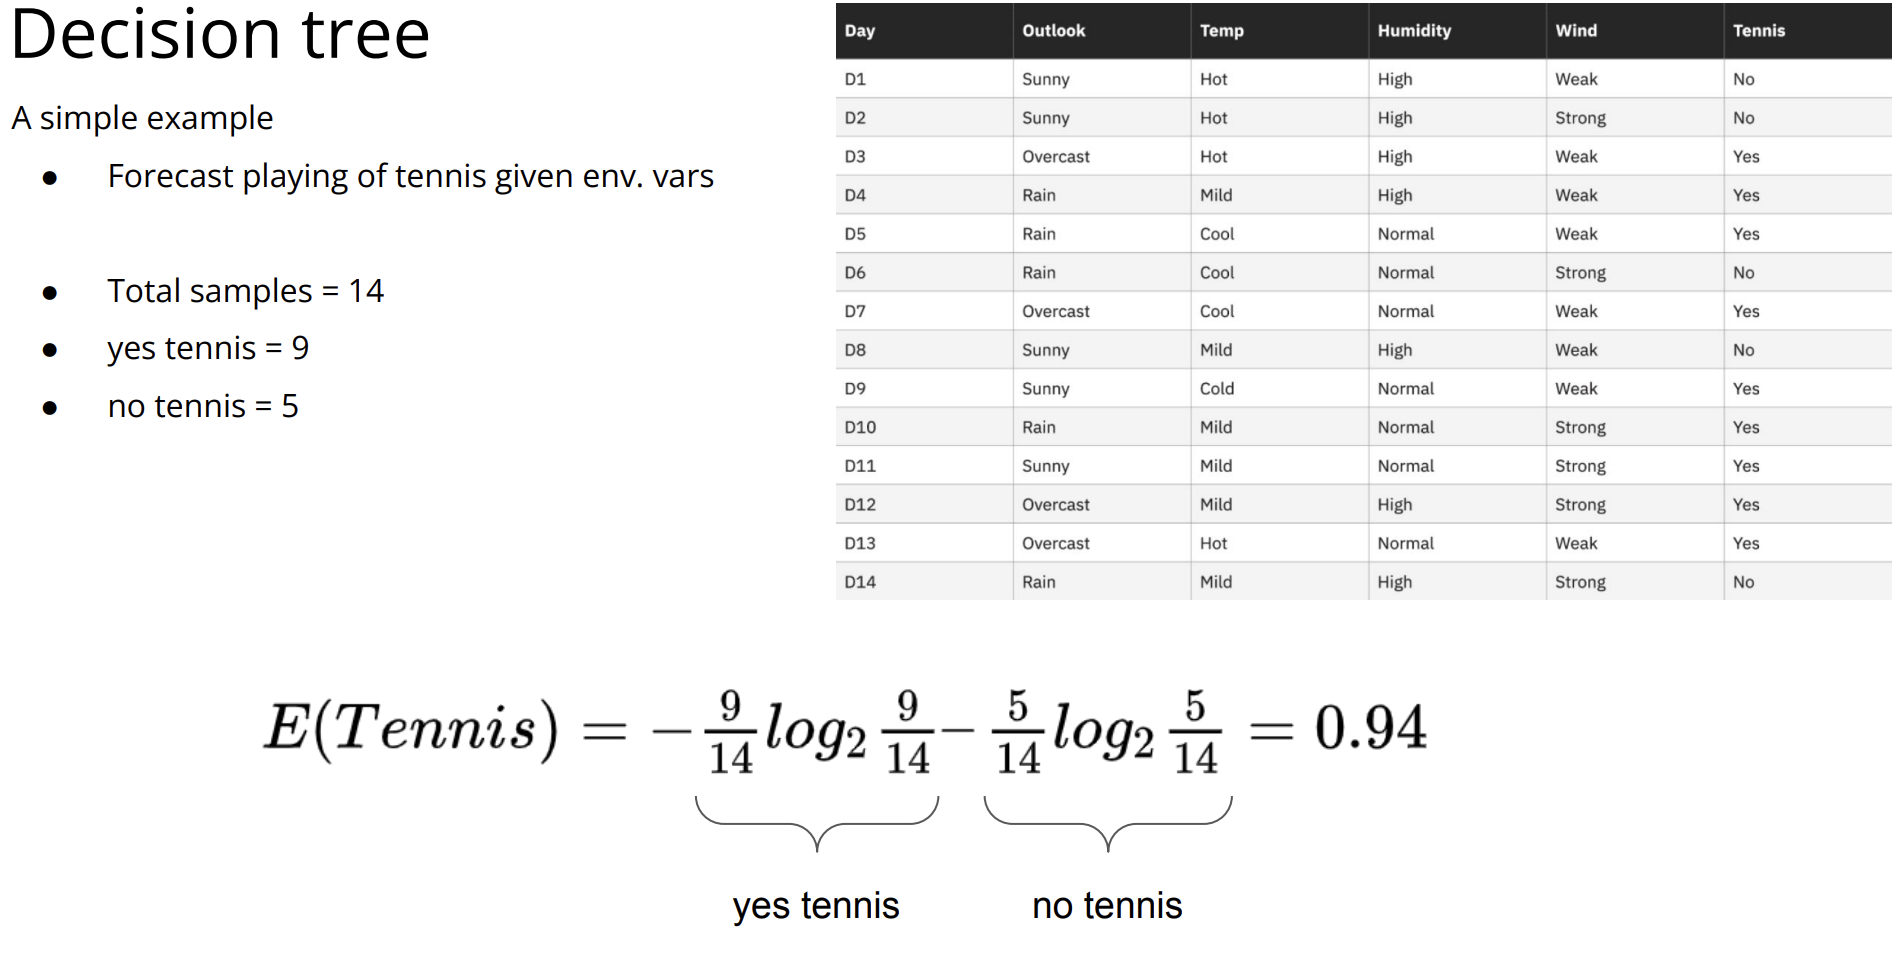

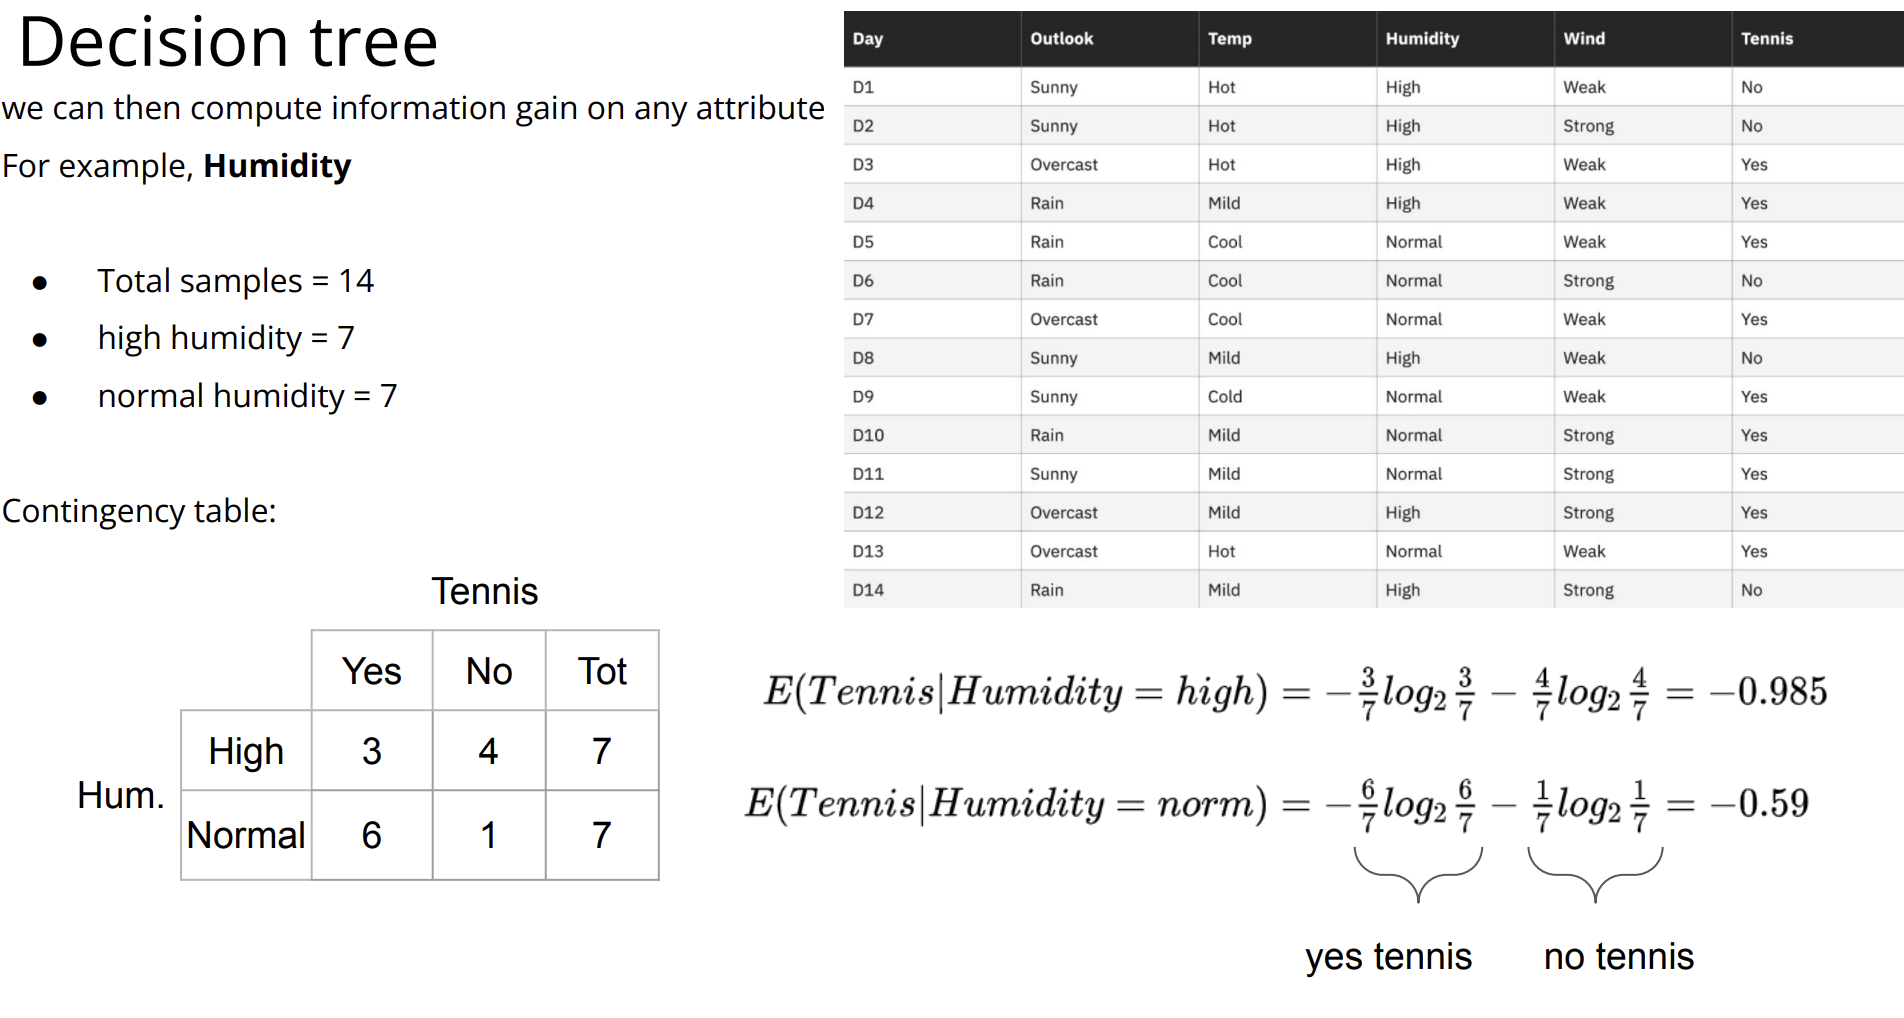

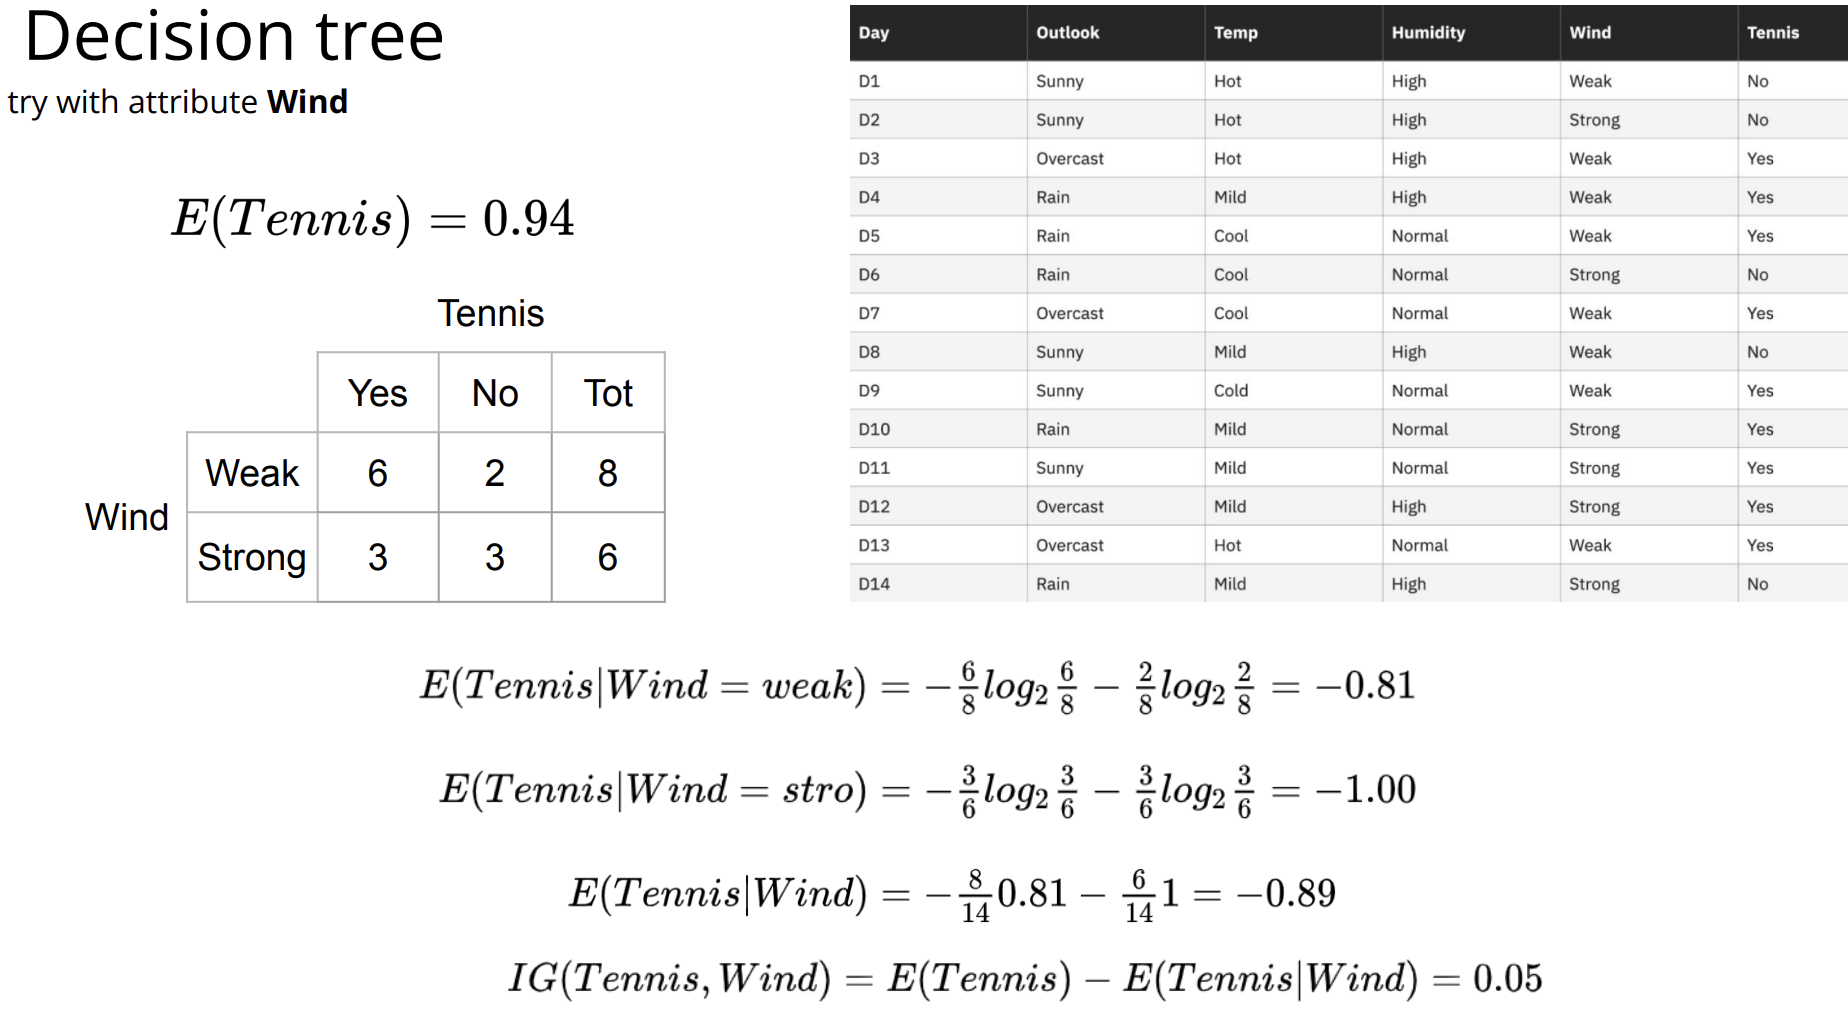

To measure the mistakes of our predictor, we use the confusion matrix:

$$
\begin{array}{|c|c|c|}
\hline
 & \text{Predicted Positive} & \text{Predicted Negative} \\
\hline
\text{Actual Positive} & \text{True Positive (TP)} & \text{False Negative (FN)} \\
\hline
\text{Actual Negative} & \text{False Positive (FP)} & \text{True Negative (TN)} \\
\hline
\end{array}
$$

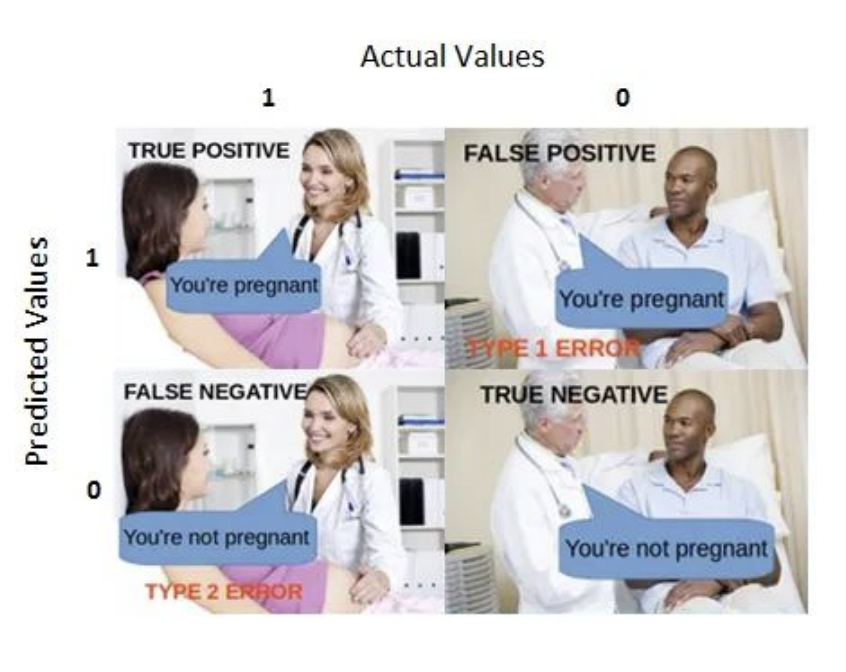

$a^2 + b^2 = c^2$  
$$\int_0^\infty e^{-x^2} dx = \frac{\sqrt{\pi}}{2}$$  
$x_i$  
$x^2$  
$a_{ij}$

# Exercise 1 - Epathitis Dataset

Tasks:
1. Explore the dataset
2. Replace missing content
3. Pre-process variables
4. Find outlayers
5. Split
6. Train a random forest
7. Evaluate performance

In [87]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df = pd.read_csv('./datasets/hepatitis.csv', sep=',', index_col=0)
df

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class
age,,,,,,,,,,,,,,,,,,,
30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85.0,18.0,4.0,NaN,False,live
50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135.0,42.0,3.5,NaN,False,live
78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96.0,32.0,4.0,NaN,False,live
31,female,NaN,True,False,False,False,True,False,False,False,False,False,0.7,46.0,52.0,4.0,80.0,False,live
34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,NaN,200.0,4.0,NaN,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,NaN,242.0,3.3,50.0,True,die
44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126.0,142.0,4.3,NaN,True,live
61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75.0,20.0,4.1,NaN,True,live


In [7]:
df.dtypes

sex                 object
steroid             object
antivirals            bool
fatigue             object
malaise             object
anorexia            object
liver_big           object
liver_firm          object
spleen_palpable     object
spiders             object
ascites             object
varices             object
bilirubin          float64
alk_phosphate      float64
sgot               float64
albumin            float64
protime            float64
histology             bool
class               object
dtype: object

In [88]:
df = df.convert_dtypes() # force pandas to infer the data types
df.dtypes

sex                string[python]
steroid                   boolean
antivirals                boolean
fatigue                   boolean
malaise                   boolean
anorexia                  boolean
liver_big                 boolean
liver_firm                boolean
spleen_palpable           boolean
spiders                   boolean
ascites                   boolean
varices                   boolean
bilirubin                 Float64
alk_phosphate               Int64
sgot                        Int64
albumin                   Float64
protime                     Int64
histology                 boolean
class              string[python]
dtype: object

In [9]:
df.isna().sum() # number of na

sex                 0
steroid             1
antivirals          0
fatigue             1
malaise             1
anorexia            1
liver_big          10
liver_firm         11
spleen_palpable     5
spiders             5
ascites             5
varices             5
bilirubin           6
alk_phosphate      29
sgot                4
albumin            16
protime            67
histology           0
class               0
dtype: int64

In [5]:
df.isna().sum() / len(df) * 100 # percentage of na

sex                 0.000000
steroid             0.645161
antivirals          0.000000
fatigue             0.645161
malaise             0.645161
anorexia            0.645161
liver_big           6.451613
liver_firm          7.096774
spleen_palpable     3.225806
spiders             3.225806
ascites             3.225806
varices             3.225806
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
class               0.000000
dtype: float64

## Cleaning dataset

### Case 1, drop NA

In [63]:
df.dropna(axis=0) # drop rows with na, 1 would have dropped columns
df.isna().sum() / len(df) * 100 # percentage of na

sex                 0.000000
steroid             0.645161
antivirals          0.000000
fatigue             0.645161
malaise             0.645161
anorexia            0.645161
liver_big           6.451613
liver_firm          7.096774
spleen_palpable     3.225806
spiders             3.225806
ascites             3.225806
varices             3.225806
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
class               0.000000
dtype: float64

In [64]:
df = df.dropna(thresh=.8*len(df), axis = 1) # drop columns with more than 80% of na
df

,sex,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,histology,class
age,,,,,,,,,,,,,,,,,,
30,male,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,False,live
50,female,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,False,live
78,female,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,False,live
31,female,<NA>,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,False,live
34,female,True,False,False,False,False,True,False,False,False,False,False,1.0,<NA>,200,4.0,False,live
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,female,True,False,True,True,True,True,False,False,True,True,True,7.6,<NA>,242,3.3,True,die
44,female,True,False,True,False,False,True,True,False,False,False,False,0.9,126,142,4.3,True,live
61,female,False,False,True,True,False,False,True,False,True,False,False,0.8,75,20,4.1,True,live


### Case 3 (preferred) - we want tot insert generated values

In [95]:
boolean_cols = df.select_dtypes(include = bool).columns


In [96]:
most_frequent_values = df[boolean_cols].mode().iloc[0]
most_frequent_values

steroid             True
antivirals         False
fatigue             True
malaise            False
anorexia           False
liver_big           True
liver_firm         False
spleen_palpable    False
spiders            False
ascites            False
varices            False
histology          False
sex_female          True
sex_male           False
Name: 0, dtype: boolean

In [97]:
df[boolean_cols] = df[boolean_cols].fillna(most_frequent_values)

In [98]:
df.isna().sum() / len(df) * 100 # percentage of na

steroid             0.000000
antivirals          0.000000
fatigue             0.000000
malaise             0.000000
anorexia            0.000000
liver_big           0.000000
liver_firm          0.000000
spleen_palpable     0.000000
spiders             0.000000
ascites             0.000000
varices             0.000000
bilirubin           3.870968
alk_phosphate      18.709677
sgot                2.580645
albumin            10.322581
protime            43.225806
histology           0.000000
class               0.000000
sex_female          0.000000
sex_male            0.000000
dtype: float64

#### Do the same for integer values

In [99]:
integer_cols = df.select_dtypes(include = int).columns
integer_cols

Index(['alk_phosphate', 'sgot', 'protime', 'class'], dtype='object')

In [100]:
median_values = df[integer_cols].median()
median_values

alk_phosphate    85.0
sgot             58.0
protime          61.0
class             1.0
dtype: Float64

In [101]:
df[integer_cols] = df[integer_cols].fillna(median_values)


#### Same for floats

In [102]:
float_cols = df.select_dtypes(include = float).columns
mean_values = df[float_values].mean()
df[float_cols] = df[float_cols].fillna(mean_values)

#### Same for categorical

In [103]:
categorical_cols = df.select_dtypes(include='string').columns
categorical_mode_cols = df[categorical_cols].mode()
df[categorical_cols] = df[categorical_cols].fillna(categorical_mode_cols)

#### Test to see if there are any null value

In [104]:
df.isnull().values.any()

False

---

## Encode the Features

In [105]:
import sklearn.ensemble
import sklearn.preprocessing
import sklearn.metrics
from sklearn.model_selection import train_test_split

In [106]:
le = sklearn.preprocessing.LabelEncoder()
df['class'] = le.fit_transform(df['class'])
# df['sex'] = le.fit_transform(df['sex'])
df

,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,sex_female,sex_male
age,,,,,,,,,,,,,,,,,,,,
30,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,61,False,1,False,True
50,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,61,False,1,True,False
78,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,61,False,1,True,False
31,True,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,80,False,1,True,False
34,True,False,False,False,False,True,False,False,False,False,False,1.0,85,200,4.0,61,False,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,True,False,True,True,True,True,False,False,True,True,True,7.6,85,242,3.3,50,True,0,True,False
44,True,False,True,False,False,True,True,False,False,False,False,0.9,126,142,4.3,61,True,1,True,False
61,False,False,True,True,False,False,True,False,True,False,False,0.8,75,20,4.1,61,True,1,True,False


#### By hand:

In [107]:
'''
df['class'] = df['class'].astype(str).map({'die': '0', 'live': '1'}).astype(int)
df['sex'] = df['sex'].astype(str).map({'male':'0', 'female' : '1'}).astype(int)
df
'''

"\ndf['class'] = df['class'].astype(str).map({'die': '0', 'live': '1'}).astype(int)\ndf['sex'] = df['sex'].astype(str).map({'male':'0', 'female' : '1'}).astype(int)\ndf\n"

#### Different way using get_dummies

In [110]:
categorical_features = df.select_dtypes(include='string').columns.tolist()
df = pd.get_dummies(df, prefix = categorical_features)
df

,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,sex_female,sex_male
age,,,,,,,,,,,,,,,,,,,,
30,False,False,False,False,False,False,False,False,False,False,False,1.0,85,18,4.0,61,False,1,False,True
50,False,False,True,False,False,False,False,False,False,False,False,0.9,135,42,3.5,61,False,1,True,False
78,True,False,True,False,False,True,False,False,False,False,False,0.7,96,32,4.0,61,False,1,True,False
31,True,True,False,False,False,True,False,False,False,False,False,0.7,46,52,4.0,80,False,1,True,False
34,True,False,False,False,False,True,False,False,False,False,False,1.0,85,200,4.0,61,False,1,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46,True,False,True,True,True,True,False,False,True,True,True,7.6,85,242,3.3,50,True,0,True,False
44,True,False,True,False,False,True,True,False,False,False,False,0.9,126,142,4.3,61,True,1,True,False
61,False,False,True,True,False,False,True,False,True,False,False,0.8,75,20,4.1,61,True,1,True,False


## Find Outliers

### Isolation Forset

In [109]:
isoforest = sklearn.ensemble.IsolationForest(n_estimators=1000, contamination=0.01, random_state=0)

res = isoforest.fit_predict(df.to_numpy())
res

array([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1, -1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
        1,  1])

In [111]:
df[res == -1]

,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,sex_female,sex_male
age,,,,,,,,,,,,,,,,,,,,
50,False,False,True,False,False,False,True,True,True,False,False,0.9,230,117,3.4,41,True,1,False,True
34,True,False,True,True,True,False,True,False,True,False,False,0.7,70,24,4.1,100,True,1,False,True


### PCA

In [128]:
pca = sklearn.decomposition.PCA(n_components=0.9999) # want an high number, close to 1, otherwise I lose too many data

X_pca = pca.fit_transform(df)

X_ori = pca.inverse_transform(X_pca)

anomaly_score = np.abs(df.to_numpy() - X_ori).sum(1)

threshold = np.quantile(anomaly_score, 0.99)

anomalous_ids = np.argwhere(anomaly_score > threshold).squeeze()

df.iloc[anomalous_ids]

,steroid,antivirals,fatigue,malaise,anorexia,liver_big,liver_firm,spleen_palpable,spiders,ascites,varices,bilirubin,alk_phosphate,sgot,albumin,protime,histology,class,sex_female,sex_male
age,,,,,,,,,,,,,,,,,,,,
51,False,False,True,False,True,True,False,True,True,False,False,1.427517,85,58,3.817266,61,False,0,True,False
53,False,False,True,False,False,True,False,True,True,False,True,1.5,81,19,4.1,48,True,1,False,True


In [131]:

# Split the dataset in 
x = df[list(set(df.columns) - set(['class']))]
y = df['class']

## Normalization

In [132]:

scaler  = sklearn.preprocessing.StandardScaler()
x = scaler.fit_transform(x)

## Split in train and test

In [134]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state = 0)

In [135]:
print(x.shape)
print(x_train.shape)
print(x_test.shape)


(155, 19)
(124, 19)
(31, 19)


## Train